In [ ]:
# データのダウンロード
! wget --quiet https://nlp100.github.io/data/neko.txt

# Mecabのインストール
! sudo apt install --quiet mecab libmecab-dev mecab-ipadic-utf8 swig -y
! pip install --quiet mecab-python3 unidic-lite
! pip install --quiet fugashi
! pip install --quiet ipadic 
import MeCab

# Mecabを使って形態素解析　-oオプションで、別のファイルに結果を出力することが可能
! mecab neko.txt -o neko.txt.mecab

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils swig swig3.0
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 30.1 MB of archives.
After this operation, 282 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 

In [ ]:
! head -n 30 /content/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


出力フォーマット：
表層形　品詞　品詞細分類1　品詞細分類2　品詞細分類3　活用型　活用形　原形　読み　発音

In [ ]:
# =============
# 30.形態素解析結果の読み込み 
# =============
sentences = []
morphemes = []
with open('/content/neko.txt.mecab', 'r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if fields[0] == '\n' or fields[0] == '':
                continue
            else:
                temp = fields[1].split(',')
                morpheme = {'surface':fields[0], 'base':temp[6], 'pos':temp[0], 'pos1':temp[1]}
                morphemes.append(morpheme)
        else:
            sentences.append(morphemes)
            morphemes = []
for morpheme in sentences[2]:
    print(morpheme)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [ ]:
# リストの先頭から10個表示
def print_10(x):
    count = 0
    for surface in x:
        count += 1
        print(surface)
        if count == 10:
            break

In [ ]:
# =============
# 31. 動詞
# =============
verb = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            verb.add(morpheme['surface'])
print(len(verb))
print("==Example==")
count = 0
print_10(verb)

3893
==Example==
焦がれ
引きずり出し
学ぶ
とめ
つかみ合い
落ちれ
抱く
聴く
かわし
取り扱い


In [ ]:
# =============
# 32. 動詞の基本形
# =============
verb_base = set()
count = 0
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            verb_base.add(morpheme['base'])
print(len(verb_base))
print("==Example==")
print_10(verb_base)

2300
==Example==
学ぶ
迂る
抱く
聴く
くる
切る
騰る
よぶ
すれる
なげる


In [ ]:
# =============
# 33. AのB
# =============
result = set()
for sentence in sentences:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            result.add(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface'])
print(len(result))
print("==Example==")
print_10(result)

4924
==Example==
国民の歓喜
難行苦行のため
他の先生
談話の火の手
当分の中
おさんの隙
近松の世話物
乾の方角
緑の黒髪
中の嫦娥


In [ ]:
# =============
# 34. 名詞の連接
# =============
# もしも名詞であれば連結し、連結数をカウント
# 名詞以外の場合は、連結数が2以上であれば出力して、連結リストと連結数を初期化
# それ以外の場合は連結リストと連結数を初期化
result = set()
for sentence in sentences:
    lists = ''
    num = 0
    for morpheme in sentence:
        #print(morpheme)
        if morpheme['pos'] == '名詞':  # 最初の形態素から順に、名詞であればlistsに連結し、連結数(num)をカウント
            lists = ''.join([lists, morpheme['surface']])
            num += 1
        elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、listsとnumを初期化
            result.add(lists)
            lists = ''
            num = 0
        else:  # それ以外の場合、listsとnumを初期化
            lists = ''
            num = 0
    if num >= 2: 
        result.add(lists)

# 確認
print(len(result))
print('--Example--')
print_10(result)

4457
--Example--
通り独逸語
阿部さん
黄瓜
出来損
麺麭
眼鼻
せんだって妻
延命息災
授業以外
一彼


In [ ]:
# 英小文字で構成された、ランダムな100文字を生成
import random
import string
n = 100
val_str = ''.join([random.choice(string.ascii_lowercase) for i in range(n)])
print(val_str)

dtkyhvmqnsrfqrqhseitivbtyhogewprcaiphgmpzqqcbuennkwislebgfgtpwolsejwxkndptyzjbdttzasmpamffztbxjjncki


In [ ]:
from collections import defaultdict
d = defaultdict(int)

for key in val_str:
    d[key] += 1

print(d)

defaultdict(<class 'int'>, {'d': 3, 't': 8, 'k': 4, 'y': 3, 'h': 4, 'v': 2, 'm': 4, 'q': 5, 'n': 5, 's': 5, 'r': 3, 'f': 4, 'e': 5, 'i': 5, 'b': 5, 'o': 2, 'g': 4, 'w': 4, 'p': 6, 'c': 3, 'a': 3, 'z': 4, 'u': 1, 'l': 2, 'j': 4, 'x': 2})


In [ ]:
# =============
# 35. 単語の出現頻度
# =============
# defaultdictの利用　dictの初期化を関数に従って実施することができる
from collections import defaultdict

result = defaultdict(int)
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] != '記号':
            result[morpheme['base']] += 1 
# 辞書を降順にソートする sort(reverse=True)
# items()メソッドで(key, value)のタプルとして受け取れる、　lambda式を使ってvalueでソートを行う
result = sorted(result.items(), reverse=True, key=lambda x: x[1])
print_10(result)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


<BarContainer object of 10 artists>

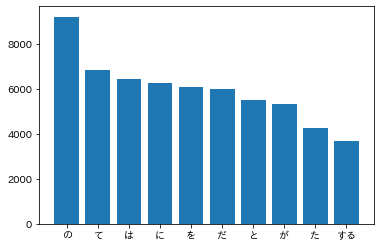

In [ ]:
# =============
# 36. 頻度上位10語
# =============
# Matplotlibの日本語対応
! pip install --quiet japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib

# 35で作った辞書の上位10語のkeyとvalueをそれぞれ取り出す
keys = [a[0] for a in result[0:10]]
values = [a[1] for a in result[0:10]]
plt.bar(keys, values)

<BarContainer object of 10 artists>

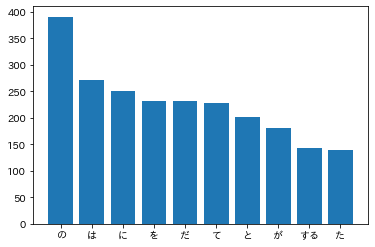

In [ ]:
# =============
# 37. 「猫」と共起頻度の高い上位10語
# =============
# 35と同じようにdictを使う
from collections import defaultdict

result = defaultdict(int)
for sentence in sentences:
    if '猫' in [morpheme['surface'] for morpheme in sentence]:  # 文章の形態素に「猫」が含まれていたら辞書に追加する
        for morpheme in sentence:
            if morpheme['pos'] != '記号':
                result[morpheme['base']] += 1 
del result['猫']       # 猫の辞書はいらないので削除
result = sorted(result.items(), reverse=True, key=lambda x: x[1])

# Matplotlibの日本語対応
! pip install --quiet japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib

keys = [a[0] for a in result[0:10]]
values = [a[1] for a in result[0:10]]
plt.bar(keys, values)

dict_values([554, 481, 6420, 248, 5972, 2320, 47, 115, 28, 118, 2084, 40, 4267, 1529, 6, 13, 5337, 108, 719, 539, 346, 3, 1, 3657, 127, 2191, 29, 6848, 4, 246, 22, 1777, 96, 53, 272, 116, 981, 6071, 675, 30, 65, 347, 5508, 381, 35, 234, 35, 1, 2, 546, 649, 9194, 38, 7, 10, 10, 168, 77, 185, 576, 17, 29, 2479, 3052, 2031, 30, 8, 1, 502, 150, 134, 3, 6243, 7, 149, 2, 3, 345, 70, 1, 27, 231, 294, 172, 18, 282, 18, 1, 987, 88, 195, 19, 108, 62, 8, 5, 450, 115, 58, 5, 44, 8, 19, 7, 51, 120, 12, 13, 94, 2, 1207, 14, 1120, 32, 2, 1, 26, 34, 19, 33, 79, 5, 3, 43, 13, 414, 73, 21, 52, 45, 217, 49, 55, 113, 18, 34, 102, 32, 1, 1, 42, 175, 173, 59, 36, 142, 52, 18, 74, 33, 3, 14, 12, 67, 16, 317, 313, 11, 86, 11, 149, 12, 250, 34, 4, 3, 9, 208, 10, 3, 108, 14, 12, 166, 1, 39, 3, 4, 269, 7, 13, 23, 16, 4, 12, 4, 62, 2, 1034, 9, 12, 85, 95, 15, 158, 220, 129, 18, 8, 238, 4, 460, 119, 2, 2, 311, 133, 3, 1, 45, 11, 154, 3, 71, 36, 10, 241, 154, 73, 3, 107, 19, 2, 102, 2, 32, 40, 51, 26, 1, 11, 340, 1

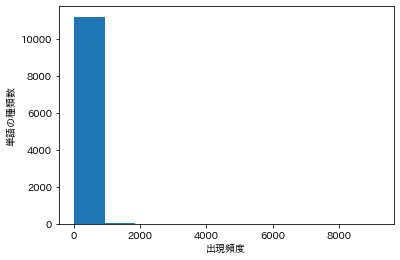

In [ ]:
# =============
# 38. ヒストグラム
# =============
result = defaultdict(int)
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] != '記号':
            result[morpheme['base']] += 1
# 出現回数の取得
result = result.values()
plt.hist(result, bins=10)  # binsは表示する棒の数の指定
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

defaultdict(<class 'int'>, {'一': 554, '吾輩': 481, 'は': 6420, '猫': 248, 'だ': 5972, 'ある': 2320, '名前': 47, 'まだ': 115, '無い': 28, 'どこ': 118, 'で': 2084, '生れる': 40, 'た': 4267, 'か': 1529, 'とんと': 6, '見当': 13, 'が': 5337, 'つく': 108, 'ぬ': 719, '何': 539, 'でも': 346, '薄暗い': 3, 'じめじめ': 1, 'する': 3657, '所': 127, '*\n': 2191, '泣く': 29, 'て': 6848, 'いた事': 4, 'だけ': 246, '記憶': 22, 'いる': 1777, 'ここ': 96, '始める': 53, '人間': 272, 'という': 116, 'もの': 981, 'を': 6071, '見る': 675, 'しかも': 30, 'あと': 65, '聞く': 347, 'と': 5508, 'それ': 381, '書生': 35, '中': 234, '一番': 35, '獰悪': 1, '種族': 2, 'そう': 546, 'この': 649, 'の': 9194, '時々': 38, '我々': 7, '捕える': 10, '煮る': 10, '食う': 168, '話': 77, 'しかし': 185, 'その': 576, '当時': 17, '考': 29, 'も': 2479, 'ない': 3052, 'から': 2031, '別段': 30, '恐い': 8, 'いとも': 1, '思う': 502, 'ただ': 150, '彼': 134, '掌': 3, 'に': 6243, '載せる': 7, 'られる': 149, 'スー': 2, '持ち上げる': 3, '時': 345, '何だか': 70, 'フワフワ': 1, '感じ': 27, 'ばかり': 231, '上': 294, '少し': 172, '落ちつく': 18, '顔': 282, 'いわゆる': 18, '始': 1, 'う': 987, '妙': 88, '今': 195, '残る': 19, 

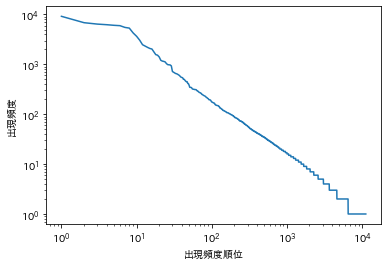

In [ ]:
# =============
# 39. Zipfの法則
# =============
result = defaultdict(int)
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] != '記号':
            result[morpheme['base']] += 1
print(result)
result = sorted(result.items(), reverse=True, key=lambda x: x[1])
# 出現順位  
ranks = [r+1 for r in range(len(result))]
# 出現頻度
values = [a[1] for a in result]
# グラフ
plt.plot(ranks, values)
# set_xscaleとset_yscaleにlogを指定することで両対数グラフを書くことが可能
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()